In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import csv
import pandas as pd

def make_points(n):
    '''Generate set of points (sites) on a 2d plane
    using a normal distribution.  
    
    n - number of points

    returns: a set of points (demand) by writing to a file 'demand.csv'

    '''

    np.random.seed(123)

    mu, sigma = 0, 1 
    xs = np.random.normal(mu, sigma, n) 
    ys = np.random.normal(mu, sigma, n) 

    plt.scatter(xs, ys)

    # convert to lat/lng for saving
    ss = np.vstack([xs.ravel(),ys.ravel()]).T

    # add id
    ss = np.append(ss, np.arange(0, ss.shape[0]).reshape(ss.shape[0],1), axis=1)

    # re-arrange id 
    permutation = [2, 0, 1]
    idx = np.empty_like(permutation)
    idx[permutation] = np.arange(len(permutation))
    ss[:] = ss[:, idx]

    #np.array(['d_'+str(x) for x in np.arange(0,10)]).reshape(5,2)
    #dem_id = np.array(['d_' + str(x) for x in np.arange(0, len(xs))]).reshape(len(xs),1)
    #dem_id = list(itertools.chain(dem_id))
    #dem_id = map(str, dem_id)
    #ss = np.append(ss, dem_id, axis=1)
    
    # save to demand 
    #fmt = ['%f', '%f', '%i']
    fmt = ['%i', '%f', '%f']
    np.savetxt('demand.csv', ss, delimiter=',', header='x,y,demand_id', comments='', fmt=fmt)


def make_grid(q):
    '''generate regular grid over 2d space
    
    q - number of quadrants (cells) on the grid 

    returns: P(ID, X, Y)
    writes: array to file

    '''

    n = q + 2 # the start and endpoint are always on 0/1

    nx, ny = n, n

    x = np.linspace(0,1,nx)
    y = np.linspace(0,1,nx)
    x = x[1:len(x)-1]
    y = y[1:len(y)-1]

    xx, yy = np.meshgrid(x,y)

    ss = np.vstack([xx.ravel(),yy.ravel()]).T

    # add id
    ss = np.append(ss, np.arange(0,ss.shape[0]).reshape(ss.shape[0],1), axis=1)
    
    # plot and save a plot
    plt.scatter(ss[:,0],ss[:,1])

    # save to file
    np.savetxt('facility.csv', ss, delimiter=',', header='x,y,facility_id', comments='')


def find_covered(fac, sites, threshold):

    '''For each facility (F) and demand point (D) calculate the pairwise distance. 
    
    fac, sites - 2d array with xy-coords
    
    return: data in the form: F: {D1, D2, D3}
    
    ''' 

    dist_matrix = cdist(x, y)

    rows = dist_matrix.shape[0]
    cols = dist_matrix.shape[1]

    lst_array = []
    dict_fac = {}

    for i in range(0,rows):
        for j in range(0,cols):
            lst_array.append([i,j,dist_matrix[i,j]])
            if arr[i,j]<=1: # if within threshold
                key = str(i)
                dict_fac.setdefault(key, []).append(j)

    stacked = np.vstack(lst_arr)

    # add id
    stacked = np.append(stacked, np.arange(0,stacked.shape[0]).reshape(stacked.shape[0],1), axis=1)
    
    # save pairwise distance to file 
    np.savetxt('pairwise_dist.csv', stacked, delimiter=',', header='facility,demand,dist,d', comments='')

    # save dictionary to file 
    with open('dict.csv', 'w') as csv_file:  
        writer = csv.writer(csv_file)
        for key, value in dict_fac.items():
            writer.writerow([key, value])




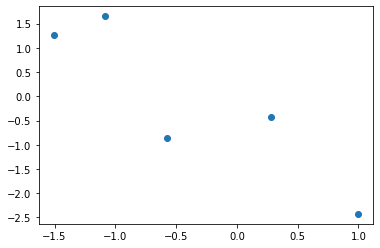

In [14]:
make_points(5)

(0.0, 1.0)

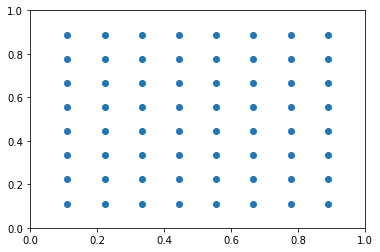

In [49]:

n = 10
nx, ny = n, n

x = np.linspace(0,1,nx)
y = np.linspace(0,1,nx)
x = x[1:len(x)-1]
y = y[1:len(y)-1]

xx, yy = np.meshgrid(x,y)

plt.scatter(xx,yy)
plt.xlim(0,1)
plt.ylim(0,1)

(64, 2)


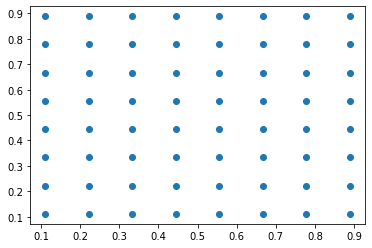

In [76]:
ss = np.vstack([xx.ravel(),yy.ravel()])
ss = ss.T
print(ss.shape)

plt.scatter(ss[:,0],ss[:,1])

In [181]:
arr = np.repeat([1,2,3], 3).reshape(3,3)
print(arr)

rows = arr.shape[0]
cols = arr.shape[1]

#new_array = np.empty([rows**cols, 3])

lst_arr = []
dict_fac = {}

for i in range(0,rows):
    for j in range(0,cols):
        #print(i, '-->', j, '=', arr[i,j])
        lst_arr.append([i,j, arr[i,j]])
        if arr[i,j]<=1:
            key = str(i)
            dict_fac.setdefault(key, []).append(j)

print(dict_fac)

stacked = np.vstack(lst_arr)

# add id 
stacked = np.append(stacked, np.arange(0,stacked.shape[0]).reshape(stacked.shape[0],1), axis=1)
#print(stacked.shape)
#print(stacked)

np.savetxt('test.csv', stacked, delimiter=',', header='a,b,c,d', comments='')




[[1 1 1]
 [2 2 2]
 [3 3 3]]
{'0': [0, 1, 2]}


In [217]:
#repa = np.array(['d_'+str(x) for x in np.arange(0,10)]).reshape(10,1)
import itertools

repa = np.array(['d_'+str(x) for x in np.arange(0,10)]).reshape(10,1)

list(itertools.chain(*repa))

['d_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9']